# Support Vector Machines

It is considered to be the best stock (not modified) classifier. This means you can take the classifier in its basic form and run it on the data, and the results will have low error rates. SVMs are supervised learning models fot both regression and classification. SVMs find applications in text mining, chemical classification, and image and handwriteing recognition. In the simples form, a SVM separates and predicts two classes of data by estimating the optimal vector plane or hyperplane between these two classes represented in vector space. 

A basic SVM is a non-probabilistic binary classifier that uses linear classification. SVMs can also be used to perform nonlinear classification over several classes. SVM often have a good generalization performance and also implement a kind of automatic complexity control to avoid overfitting. Hence SVMs are also called **large amrgin classifiers**.

Another interesting fact about SVM is that they scale very well with the number of features being modeled and thus, SVMs are often used in machine learning problems that deal with a **large number of features**.

**Pros**
* Effective in high dimensional spaces
* Still effective in the case where number of dimensions is greater than the numer of samples
Low generalization error 
* Computationally inexpensive, it only uses a subset of training points to create the model (memory efficient)
* Easy to repeat results
* Versatile: different kernel functions can be specified for the decision function

**Cons**
* If the number of features is much greater than the number of samples, the method is likely to give poor performances.
* Sensitive to tuning parameters and kernel choice
* SVMs do not directly provide probability estimates.
* Natively only handles binary classification

**Works with**
Numeric values, nominal values

### Separating data with the maximum margin

We need an **hyperplane** to separate the data. The hyperplane is the decision boundary. We'd like to find the point closest to the separating line as possible. This is known as **margin**. We want to have the greatest possible margin, because if we made a mistake trained our classifier on limited data, we'd like to be as robust as possible. SVM try to maximizae the maring by solving a quadratic optimization problem. The SMO algorithm allows tast training of SVMs by optimizing only two alphas at a time. 

The points closest to the separating hyperplane are known as **support vectors**. Now tha we know that we're trying to maximize the distance from the separating line to suppor vectors, we need to finde a way to optimize the problem.

What happens if data is not linearly separable? We 're going to use something called a **kernel** to transform data into a form that's easily understood by the classifier. This can be called as *mapping from one feature space to another feature space*. Usually, his mapping goes from a lower dimensional feature space to a higher-dimensional space. This mapping is done by the kernel. After making the substitution, we can go about solving this linear problem in high-dimensional space, which is equivalent to solving a nonlinear problem in low-dimensional space. Replacing the inner product with a kernel is known as the *kernel trick of kernel substitution*. The *radial-bias* function is a popular kernel that measures the distance between two vectors.

SVM are a **binary classifier** and additional methids can be extended to classification of classes greater than two. The performance of an SVM is also sensitive to classification parameters and parameters of the kernel used.

In [1]:
from IPython.display import IFrame
IFrame('http://www.yaroslavvb.com/papers/rosasco-are.pdf', width=700, height=350)

SVM can be considered an **extension of the perceptron**. Using the perceptron algorithm, we minimized misclassification errors, whereas in SVMs out optimization objective is to maximize the **margin**.

## Training a Support Vector Machine via scikit-learn

In [2]:
%matplotlib inline

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]] # we use two features for visualization purposes
y = iris.target

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Normal Standard deviation of u and sigma parameters
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from sklearn.svm import SVC
# eta0 = learning rate
# n_iter = number of epochs (passes over the training set)
# Random state is used for reproducibility of the initial shuffiling
# of the training dataset
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm.predict(X_test_std))

0.97777777777777775

### Decision regions

In [12]:
from plotting import *

/Users/b3j90/anaconda/envs/nlp/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/b3j90/anaconda/envs/nlp/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


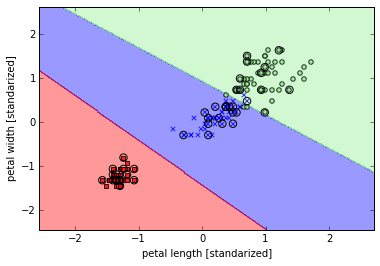

In [13]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y= y_combined, classifier=svm,
                     test_idx=range(104,150), xlabel="petal length [standarized]",
                     ylabel = 'petal width [standarized]', legend_loc = 'upper left')

**Linear Logistic regression and linear SVMs often yield very similar results**. Logistic regression tries to maximize the conditional likelihoods of the training data, which makes it more prone to outliers than SVMs. On the other hand, logistic regression is a simpler model and can be implemented easily. Moreover, logistic regression models can be updated online, which is important if we are interested in working with streaming data.

### Nonlinear problems with kernel SVM

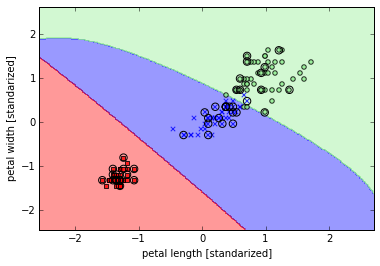

In [15]:
svm = SVC(kernel='rbf', random_state=0, gamma = 0.2, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y= y_combined, classifier=svm,
                     test_idx=range(104,150), xlabel="petal length [standarized]",
                     ylabel = 'petal width [standarized]', legend_loc = 'upper left')

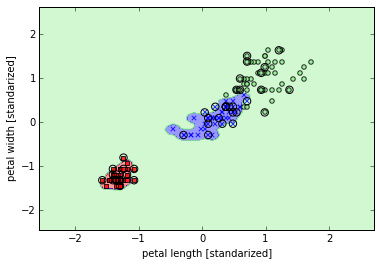

In [16]:
# We increase the value of gamma
svm = SVC(kernel='rbf', random_state=0, gamma = 100.0, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X=X_combined_std, y= y_combined, classifier=svm,
                     test_idx=range(104,150), xlabel="petal length [standarized]",
                     ylabel = 'petal width [standarized]', legend_loc = 'upper left')

This plot shows that this model will have a high generalization error on unseen data (**overfitting**).

### Different kernels

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

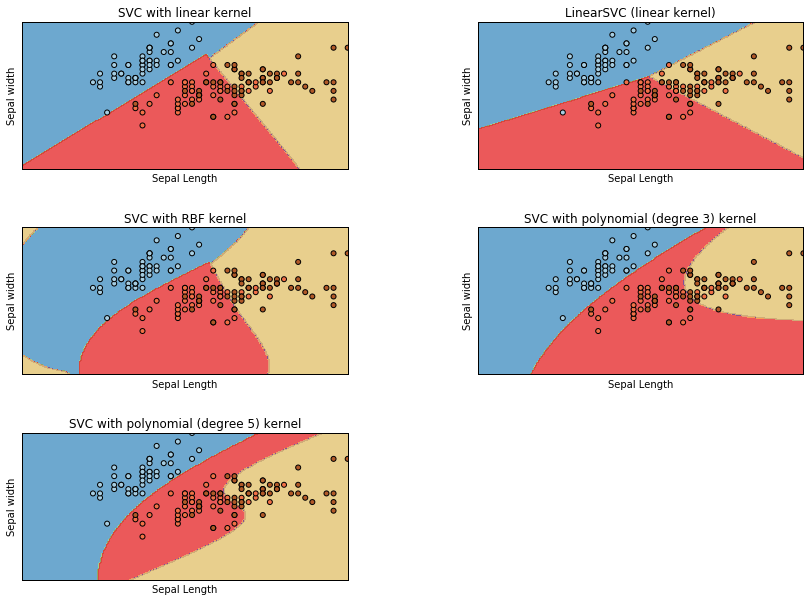

In [3]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
h = .02 # step size in mesh

# Parameters
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X,y)
lin_svc = svm.LinearSVC(C=C).fit(X,y)
rbf_svc = svm.SVC(kernel='rbf', gamma = 0.7, C=C).fit(X,y)
poly3_svc = svm.SVC(kernel='poly', degree = 3, C=C).fit(X,y)
poly5_svc = svm.SVC(kernel='poly', degree = 5, C=C).fit(X,y)

# create a plot to mesh in
x_min, x_max = X[:,0].min() - 1, X[:, 0].max()
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max()

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel', 
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with polynomial (degree 5) kernel']

plt.figure(figsize=(14,10))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly3_svc, poly5_svc)):
    plt.subplot(3,2, i + 1)
    plt.subplots_adjust(wspace = 0.4, hspace= 0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
    
    # Plot also training points
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap= plt.cm.Paired, s=25)
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    
plt.show()

### L1 Penalty and Sparsity in Logistic Regression

Comparison of the **sparsity** (percentage of zero coefficients) of solutions when L1 and L2 are used for different values of C. We can see that large values of C give more freedom to the model. Converserly, smaller valuer of C constrain the model more. In the L1 penalty case, this leads to sparser solutions.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

C=100.00
Sparsity with L1 penalty: 6.25%
Score with L1 penalty: 0.9104
Sparsity with L2 penalty: 4.69%
Score with L2 penalty: 0.9098
C=1.00
Sparsity with L1 penalty: 9.38%
Score with L1 penalty: 0.9098
Sparsity with L2 penalty: 4.69%
Score with L2 penalty: 0.9093
C=0.01
Sparsity with L1 penalty: 85.94%
Score with L1 penalty: 0.8631
Sparsity with L2 penalty: 4.69%
Score with L2 penalty: 0.8915


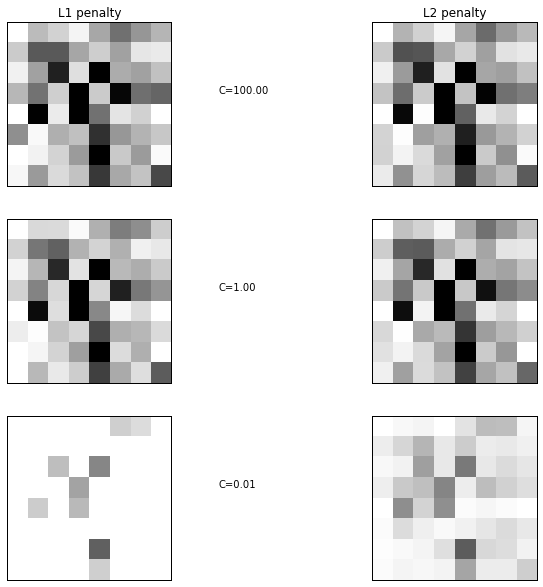

In [21]:
digits = datasets.load_digits()
X,y = digits.data, digits.target
X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y>4).astype(np.int)

plt.figure(figsize=(12,10))
for i, C in enumerate((100, 1, 0.01)):
    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01)
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01)    
    clf_l1_LR.fit(X,y)
    clf_l2_LR.fit(X,y)
    
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    
    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("Score with L1 penalty: %.4f" % clf_l1_LR.score(X,y))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("Score with L2 penalty: %.4f" % clf_l2_LR.score(X,y))
    
    l1_plot = plt.subplot(3,2,2*i+1)
    l2_plot = plt.subplot(3,2,2*(i+1))
    
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")
        
    l1_plot.imshow(np.abs(coef_l1_LR.reshape(8,8)), interpolation='nearest',
                  cmap='binary', vmax=1, vmin=0)
    
    l2_plot.imshow(np.abs(coef_l2_LR.reshape(8,8)), interpolation='nearest',
                  cmap='binary', vmax=1, vmin=0)
    
    plt.text(-8,3, "C=%.2f" % C)
    
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    

## SVM Scale Regularization parameter

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.cross_validation import ShuffleSplit
from sklearn.grid_search import GridSearchCV
from sklearn.utils import check_random_state
from sklearn import datasets

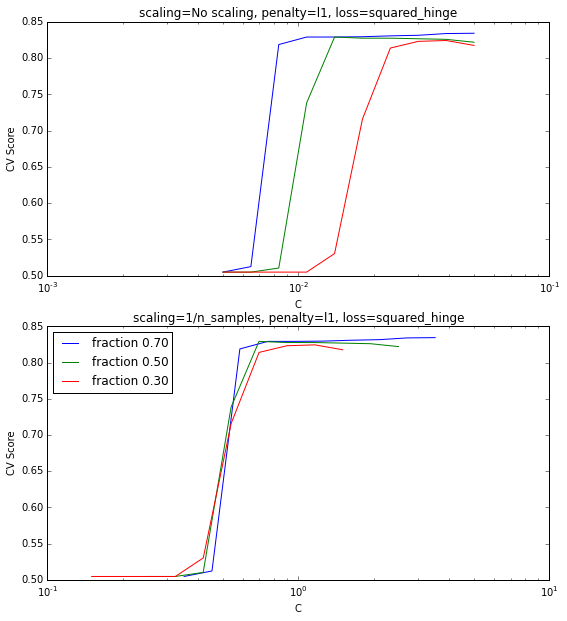

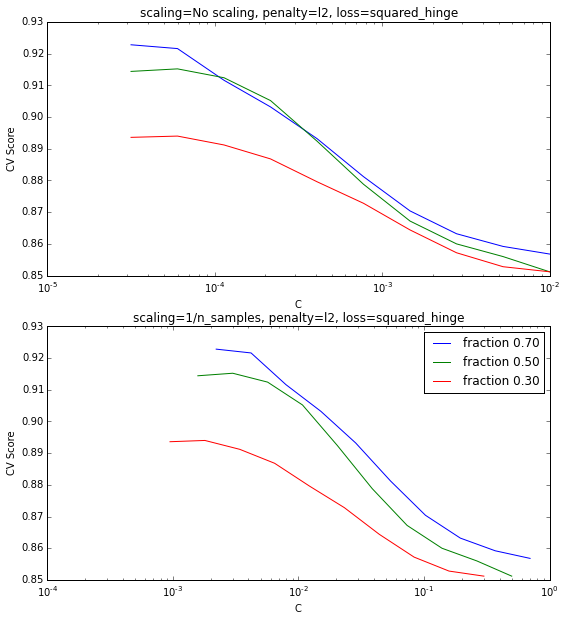

In [6]:
rnd = check_random_state(1)

# set up dataset
n_samples = 100
n_features = 300

# l1 data (only 5 informative features)
X_1, y_1 = datasets.make_classification(n_samples = n_samples,
                                        n_features = n_features,
                                        n_informative = 5,
                                        random_state = 1)
# l2 data: non sparse, but less features
y_2 = np.sign(.5 -rnd.rand(n_samples))
X_2 = rnd.randn(n_samples, n_features/5) + y_2[:, np.newaxis]
X_2 += 5 * rnd.randn(n_samples, n_features / 5)

clf_sets = [(LinearSVC(penalty='l1', loss='squared_hinge', dual = False,
                          tol=1e-3),
            np.logspace(-2.3, -1.3, 10), X_1, y_1),
           (LinearSVC(penalty='l2', loss='squared_hinge', dual=True,
                     tol=1e-4),
           np.logspace(-4.5, -2, 10), X_2, y_2)]

colors = ['b', 'g', 'r', 'c']

for fignum, (clf, cs, X, y) in enumerate(clf_sets):
    plt.figure(fignum, figsize=(9,10))
    
    for k, train_size in enumerate(np.linspace(0.3, 0.7, 3)[::-1]):
        param_grid = dict(C = cs)
        # To get nice curve, we need a large number of iterations to
        # reduce the variance
        grid = GridSearchCV(clf, refit = False, param_grid = param_grid,
                           cv = ShuffleSplit(n=n_samples, train_size=train_size,
                                            n_iter=250, random_state=1))
        
        grid.fit(X,y)
        scores = [x[1] for x in grid.grid_scores_]
        scales = [(1, 'No scaling'),
                  ((n_samples * train_size), '1/n_samples'),
                 ]
        
        for subplotnum, (scaler, name) in enumerate(scales):
            plt.subplot(2,1,subplotnum +1)
            plt.xlabel('C')
            plt.ylabel('CV Score')
            grid_cs = cs * float(scaler) 
            plt.semilogx(grid_cs, scores, label='fraction %.2f' %
                        train_size)
            plt.title('scaling=%s, penalty=%s, loss=%s' % 
                      (name, clf.penalty, clf.loss))
            
        plt.legend(loc='best')

## Recognizing hand-written digits

Classification report for classifier: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79 

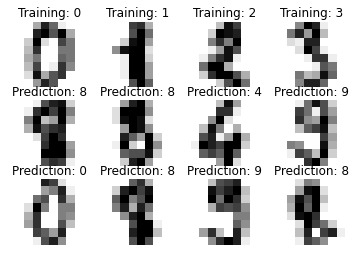

In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(3,4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title('Training: %i' % label)

# flatten the image    
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

classifier = svm.SVC(gamma=0.001)
classifier.fit(data[:n_samples/2], digits.target[:n_samples/2])

expected = digits.target[n_samples / 2:]
predicted = classifier.predict(digits.data[n_samples / 2:])

print("Classification report for classifier: %s\n%s\n"
     %(classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples/2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:8]):
    plt.subplot(3,4, index+5)
    plt.axis('off')
    plt.imshow(image, plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

## Recursive feature elimination

In [16]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

svc = SVC(kernel="linear", C = 1)
rfe = RFE(estimator=svc, n_features_to_select = 1, step = 1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

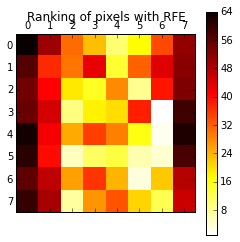

In [24]:
plt.matshow(ranking, cmap = plt.cm.hot_r)
plt.colorbar()
plt.title("Ranking of pixels with RFE")

## Recursive Feature Elimination with cross-validation

In [30]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [37]:
X, y = make_classification(n_samples = 1000, n_features = 25, n_informative = 3,
                          n_redundant = 2, n_repeated = 2, n_classes = 8, 
                           n_clusters_per_class = 1, random_state = 0)

svc = SVC(kernel="linear")
rfecv_accuracy = RFECV(estimator=svc, step = 1, cv = StratifiedKFold(y,5),
             scoring='accuracy')
rfecv_precision = RFECV(estimator=svc, step = 1, cv = StratifiedKFold(y,5),
             scoring='precision')
rfecv_recall = RFECV(estimator=svc, step = 1, cv = StratifiedKFold(y,5),
             scoring='recall')

rfecv_accuracy.fit(X,y)
rfecv_precision.fit(X,y)
rfecv_recall.fit(X,y)
print("")

Accuracy: Optimal number of features: 4
Precision: Optimal number of features: 4
Recall: Optimal number of features: 4


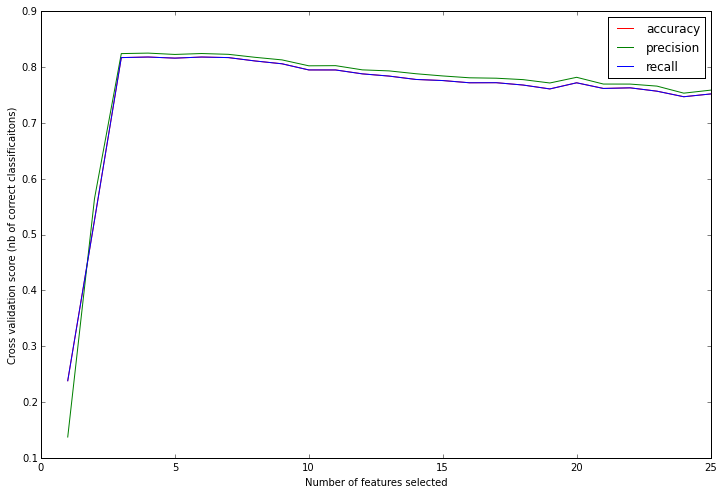

In [38]:
print("Accuracy: Optimal number of features: %d" % rfecv_accuracy.n_features_)
print("Precision: Optimal number of features: %d" % rfecv_precision.n_features_)
print("Recall: Optimal number of features: %d" % rfecv_recall.n_features_)

plt.figure(figsize=(12,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classificaitons)")
plt.plot(range(1, len(rfecv_accuracy.grid_scores_) + 1), rfecv_accuracy.grid_scores_, color='r', label="accuracy")
plt.plot(range(1, len(rfecv_precision.grid_scores_) + 1), rfecv_precision.grid_scores_, color='g', label="precision")
plt.plot(range(1, len(rfecv_recall.grid_scores_) + 1), rfecv_recall.grid_scores_, color = 'b', label="recall")
plt.legend(loc='better')

In [46]:
import numpy as np
from sklearn import cross_validation, datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10,10,20)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_validation.cross_val_score(svc, X, y, n_jobs = 1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

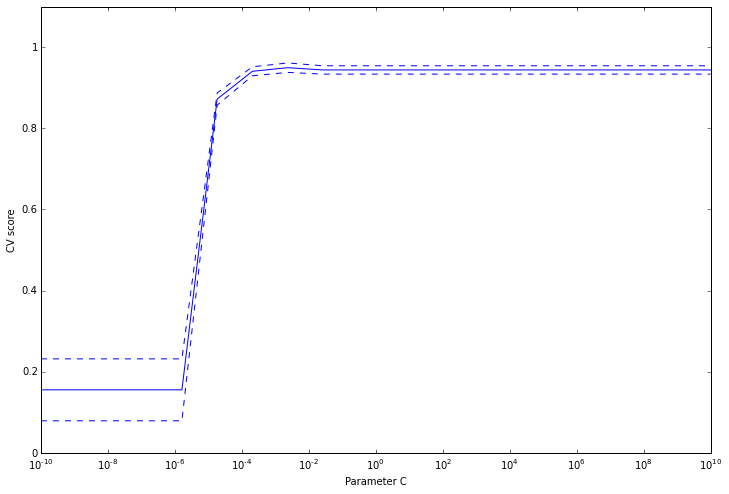

In [47]:
plt.figure(1, figsize=(12,8))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

## SVM: Weighted sampels
Source: http://scikit-learn.org/stable/auto_examples/svm/plot_weighted_samples.html

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
def plot_decision_function(classifier, sample_weight, axis, title):
    xx, yy = np.meshgrid(np.linspace(-4,5,500), np.linspace(-4,5,500))
    
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(X[:,0], X[:,1], c=Y, s = 100 * sample_weight, alpha = 0.9, 
                 cmap = plt.cm.bone)
    axis.axis('off')
    axis.set_title(title)

In [3]:
np.random.seed(0)
X = np.r_[np.random.randn(10,2) + [1,1], np.random.randn(10,2)]
Y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to outliers
sample_weight_last_ten[15:] *=5
sample_weight_last_ten[9] *=15

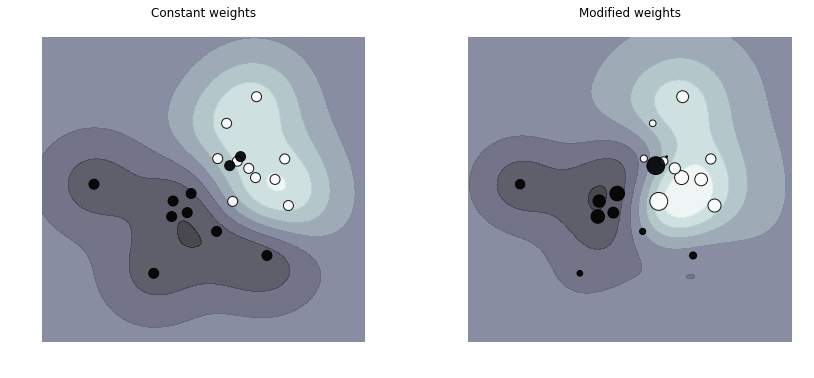

In [4]:
clf_weights = svm.SVC()
clf_weights.fit(X, Y, sample_weight = sample_weight_last_ten)
clf_no_weights = svm.SVC()
clf_no_weights.fit(X,Y)
fig, axes = plt.subplots(1,2, figsize=(14,6))
plot_decision_function(clf_no_weights, sample_weight_constant, axes[0],
                      "Constant weights")
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1],
                      "Modified weights")
plt.show()

## RBF SVM Parameters
Source: http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

The best parameters are {'C': 10000000.0, 'gamma': 9.9999999999999995e-07} with a score of 0.97


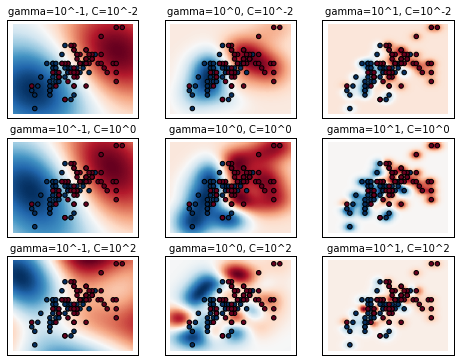

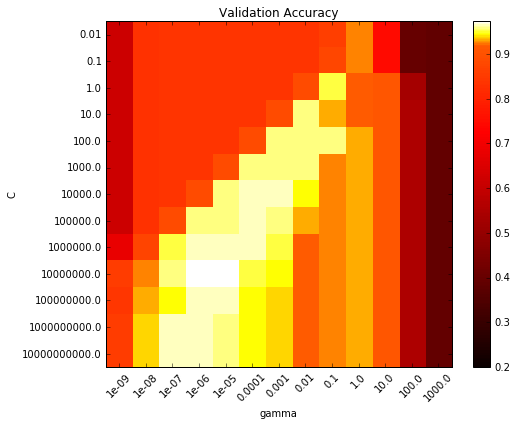

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.grid_search import GridSearchCV

# Utility function to move the midpoint of a colormap to be around
# the values

class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)
        
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value,x,y))
    
iris = load_iris()    
X = iris.data
y = iris.target

X_2d = X[:, :2]
X_2d = X_2d[y>0] # Binary classification problem
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma = gamma_range, C=C_range)
cv = StratifiedShuffleSplit(y, n_iter=5, test_size = 0.2, random_state = 2016)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv = cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %.02f" % (grid.best_params_, grid.best_score_))

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# draw visualization of parameter effects
plt.figure(figsize=(8,6))
xx, yy = np.meshgrid(np.linspace(-3,3,200), np.linspace(-3,3,200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # Evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k+1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')
    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = [x[1] for x in grid.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
        
plt.figure(figsize=(8,6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap = plt.cm.hot, 
           norm=MidpointNormalize(vmin=0.2, midpoint = 0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation Accuracy")
plt.show()